# Channel Modelling

In this notebook, a SISO Channel Simulator will be tested to show the details of Wireless Multipath Fading Channel Modelling.

The Channel Simulator can simulate a custom channel (ITU models, COST 207, 3GPP models) with the following characteristics:
- Small-scale Fading Characteristics:
    - Frequency Flat/Selective by specifying a time varying or Block faded Power Delay Profile
        - By time varying it is meant: variable tap gains, variable delays and a variable number of taps
        - The Power Delay Profile is sampled at the same rate as the signal.
          multiple sampling rate with interpolation must be used if TDL is sampled at a different sampling rate
    - Time Variation Slow/Fast with specified Doppler Spectrum:
        - Jake's, Gaussian,.. (More to be added later like rounded, flat,...)
    - Channel Envelope Distribution:
        - Rayleigh
        - Rician
- Correlated or Uncorrelated paths (WSSUS not valid) (to be added later)
- Diffuse or Discrete Multipath Channel Model


## Generation of Tap-Gain Processes

The Modelling approach considered thus far require two main steps for their implementation:
- First, we generate a set of white (discrete-time) Gaussian processes. 
- Second, we need to shape the power spectral density of these processes to assume the shape of
the Doppler spectrum at each tap location. Common methods include:
    - Autoregressive Moving Average (ARMA) Models
    - The Spectral Factorization

<center>

![SNOWFALL](imgs/3.0.png)

</center>

The two fundamental approaches to model a colored Gaussian random process are according to the required Doppler Spectrum: 
- The Filter Method 

<center>

![SNOWFALL](imgs/3.2.png)

</center>

- The Sum-of-Sinusoids (SOS)

<center>

![SNOWFALL](imgs/3.1.png)

</center>

## Testing Simulator

In [109]:
import numpy as np
import matplotlib, matplotlib.pyplot as plt
from SISO_Channel_Simulator import SISO_Channel_Simulator

print('Matplotlib', matplotlib.__version__)
print('NumPy', np.__version__)

Matplotlib 3.7.2
NumPy 1.23.3


In [110]:
#time-domain parameters
T = 2 #signal time in seconds
Ts = 0.0001 #sampling time
num_samples = int(T / Ts)
fs = 1 / Ts #sampling frequncy
ip_sig = np.random.randn(num_samples)

#### Flat-Fading Channel With A Rayleigh Process - Jake's Doppler Spectrum

In [111]:
model = SISO_Channel_Simulator(ip_signal=ip_sig, Fs=fs, Fc = None, fading_process='Rayleigh', 
                 rho=None, F_rho=None, theta_rho=None,
                 doppler_spectrum='Jakes', max_doppler_shift=100, num_sinusoids=200,
                 path_delays=None, avg_path_gains=None, norm_path_gains=False)

op_signal = model.run()

print(op_signal.shape)

(20000, 20000)


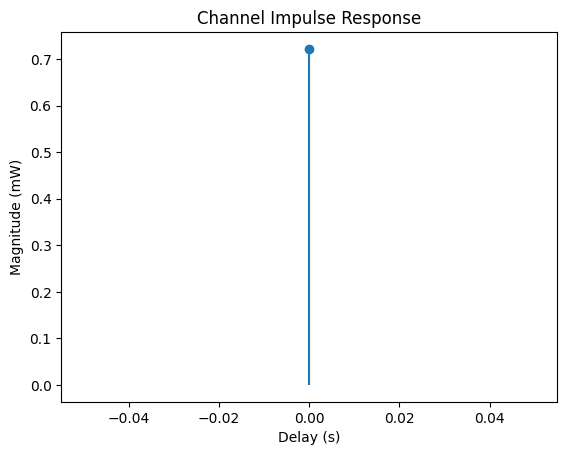

In [112]:
model.visualize("impulse response")

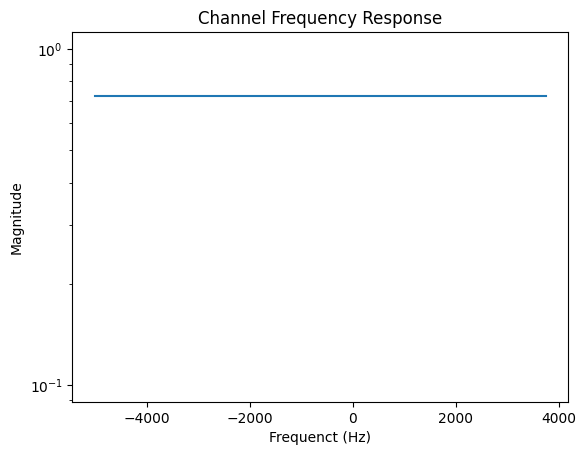

In [113]:
model.visualize("channel frequency response")

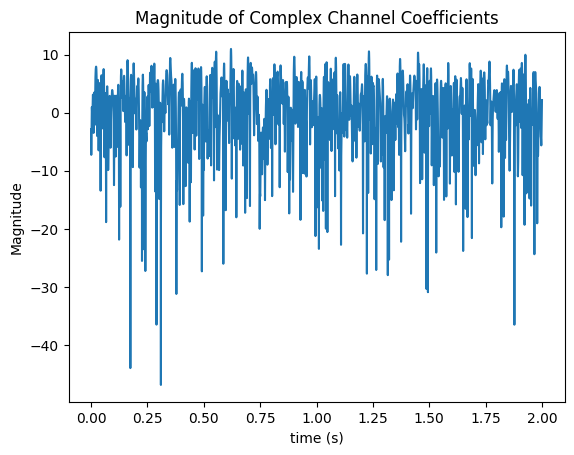

In [114]:
model.visualize("channel envelope")

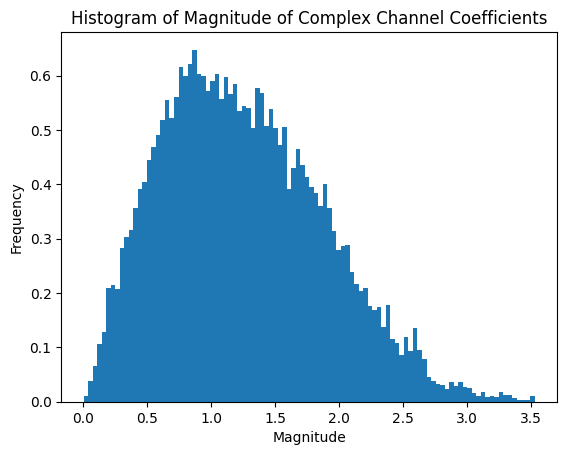

In [115]:
model.visualize('channel envelope histogram')

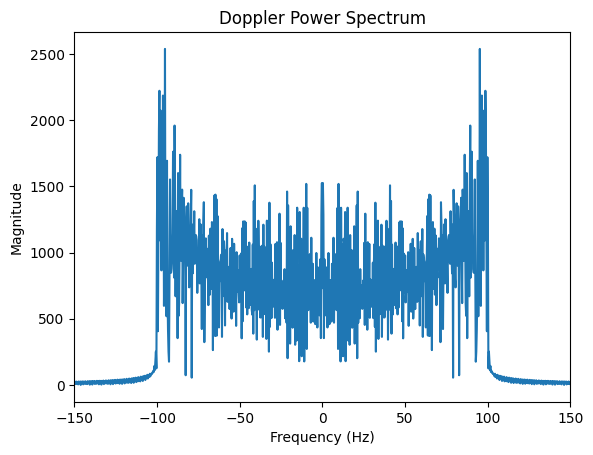

In [116]:
model.visualize("doppler spectrum")

### Flat-Fading With A Rician Process - Jake's Doppler Spectrum

In [117]:
model = SISO_Channel_Simulator(ip_signal=ip_sig, Fs=fs, Fc = None, fading_process='Rician', 
                 rho=1, F_rho=5, theta_rho=0.5,
                 doppler_spectrum='Jakes', max_doppler_shift=100, num_sinusoids=200,
                 path_delays=None, avg_path_gains=None, norm_path_gains=False)

op_signal = model.run()

print(op_signal.shape)

(20000, 20000)


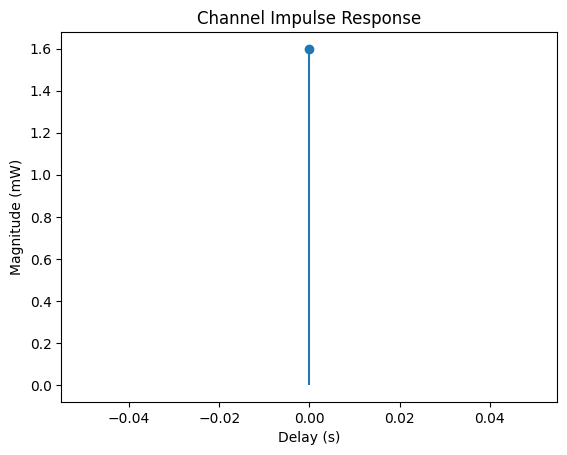

In [118]:
model.visualize("impulse response")

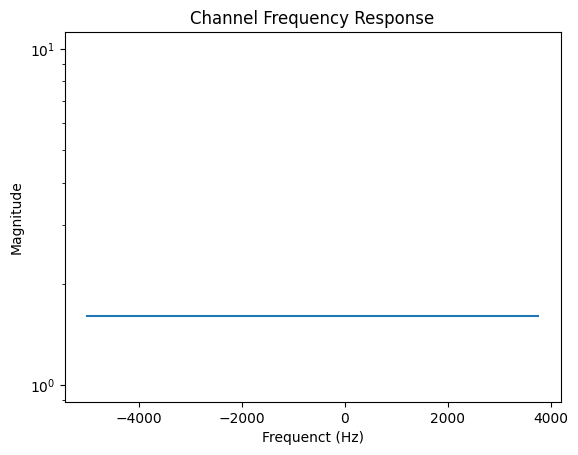

In [119]:
model.visualize("channel frequency response")

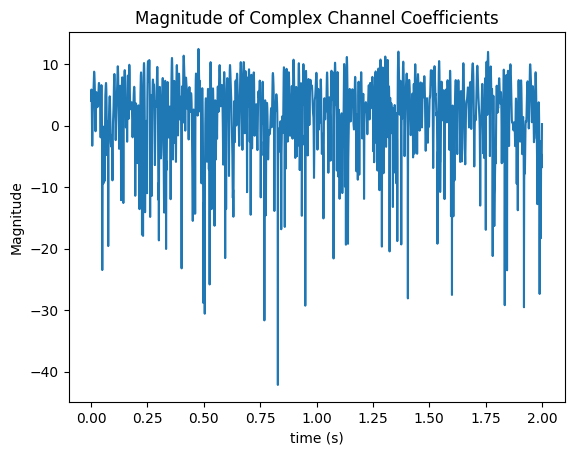

In [120]:
model.visualize("channel envelope")

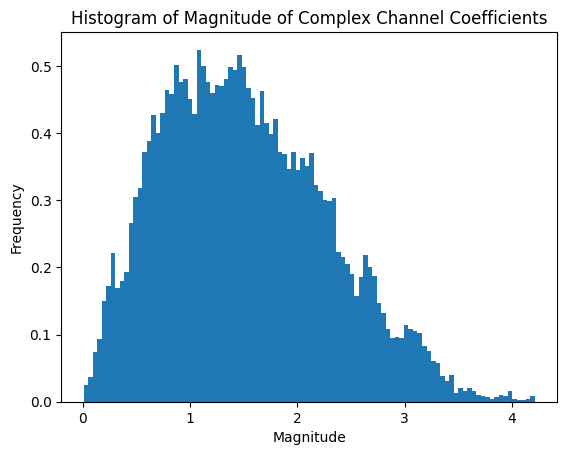

In [121]:
model.visualize("channel envelope histogram")

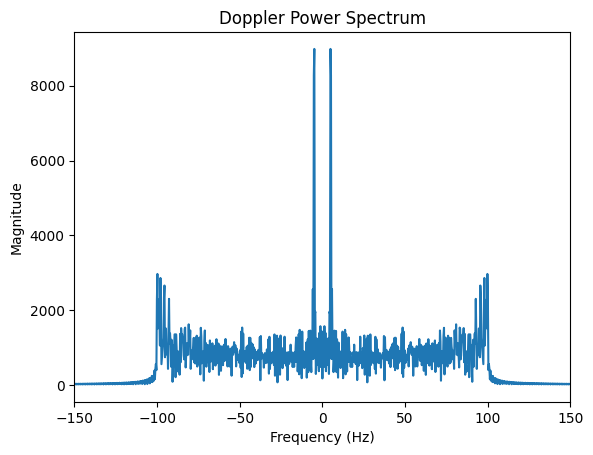

In [122]:
model.visualize("doppler spectrum")

### Frequency-Selective With A Rayleigh Process - Jake's Doppler Spectrum

In [123]:
P_dBm = np.array([0,-5, -10, -15, -20]).reshape(1,-1)
delays = np.array([0.25, 0.5, 0.75, 1.0, 1.5]).reshape(1,-1)

In [124]:
model = SISO_Channel_Simulator(ip_signal=ip_sig, Fs=fs, Fc = None, fading_process='Rayleigh', 
                 rho=None, F_rho=None, theta_rho=None,
                 doppler_spectrum='Jakes', max_doppler_shift=100, num_sinusoids=200,
                 path_delays=delays, avg_path_gains=P_dBm, norm_path_gains=False)

op_signal = model.run()
model.Ch_env.shape

(20000, 5)

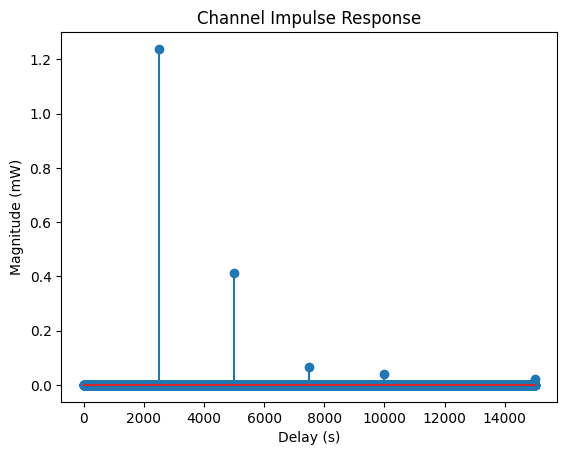

In [125]:
model.visualize("impulse response")

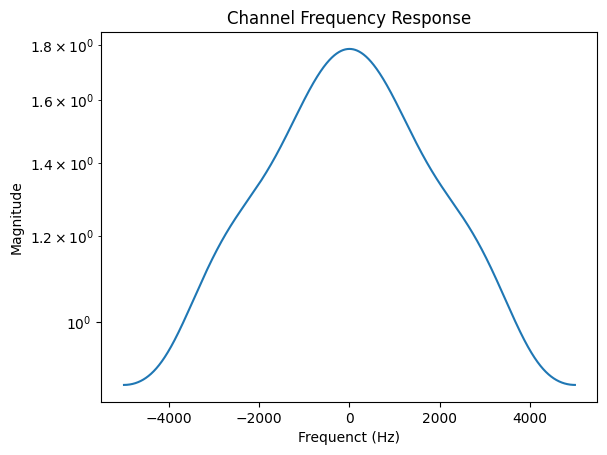

In [126]:
model.visualize("channel frequency response")

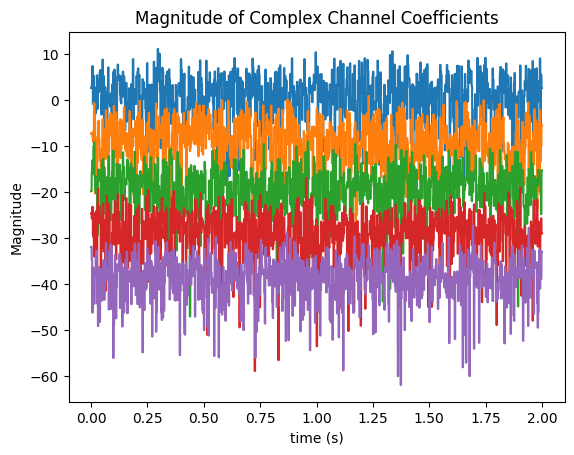

In [127]:
model.visualize("channel envelope")

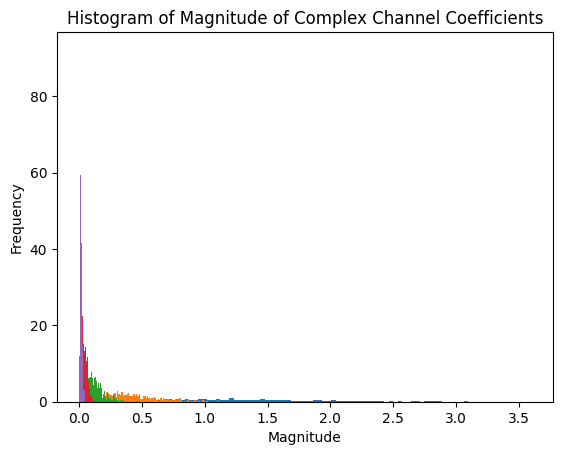

In [128]:
model.visualize("channel envelope histogram")

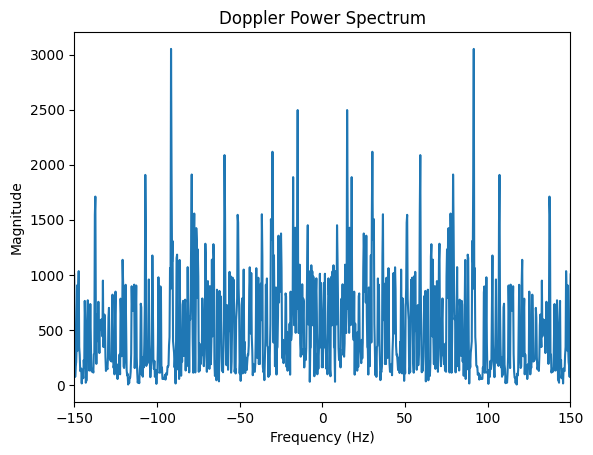

In [129]:
model.visualize("doppler spectrum")

### Frequency-Selective With A Rician Process - Jake's Doppler Spectrum

In [130]:
model = SISO_Channel_Simulator(ip_signal=ip_sig, Fs=fs, Fc = None, fading_process='Rician', 
                 rho=1, F_rho=5, theta_rho=0.5,
                 doppler_spectrum='Jakes', max_doppler_shift=100, num_sinusoids=200,
                 path_delays=delays, avg_path_gains=P_dBm, norm_path_gains=False)

op_signal = model.run()
model.Ch_env.shape

(20000, 5)

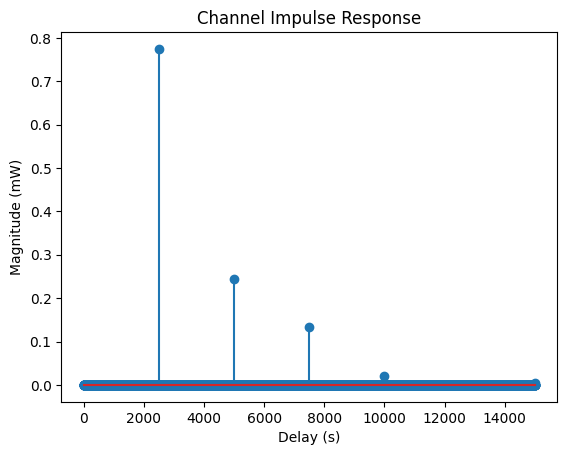

In [131]:
model.visualize("impulse response")

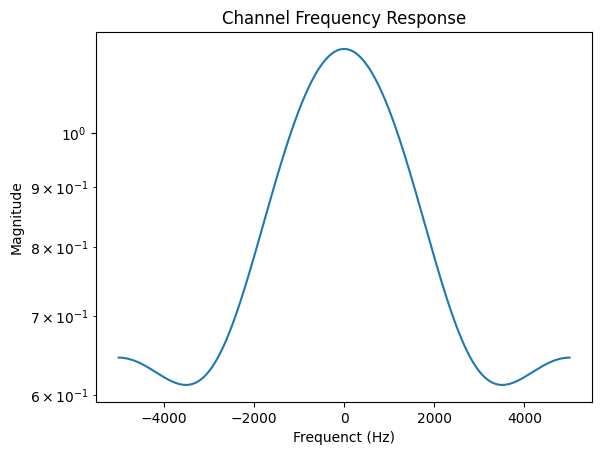

In [132]:
model.visualize("channel frequency response")

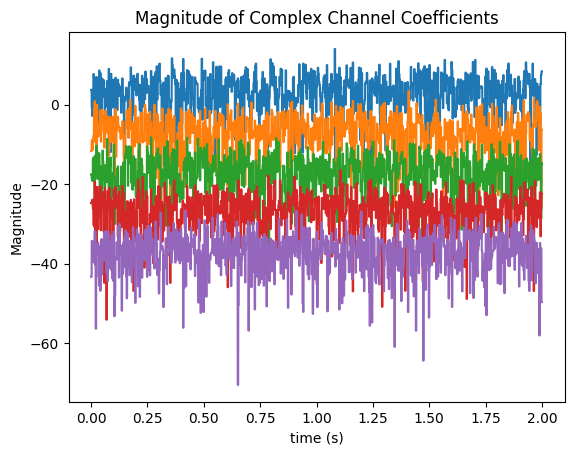

In [133]:
model.visualize("channel envelope")

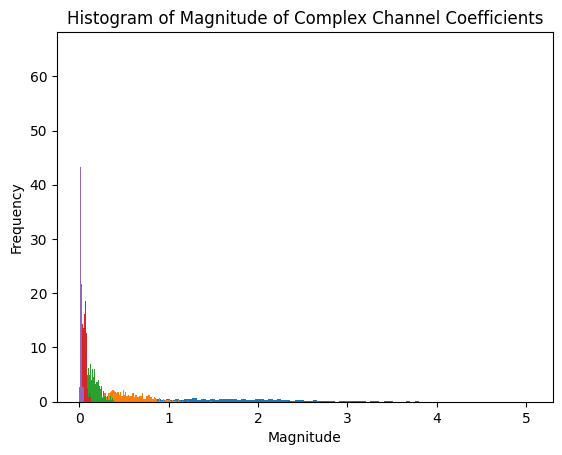

In [134]:
model.visualize("channel envelope histogram")

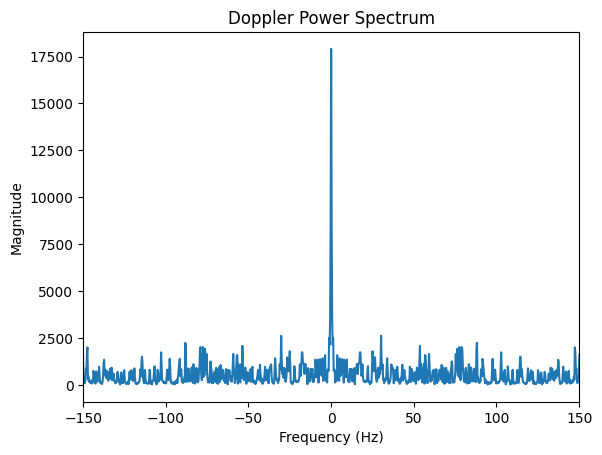

In [135]:
model.visualize("doppler spectrum")